In [1]:
import pandas as pd
from utils import *
import seaborn as sns
import matplotlib.pyplot as plt

EPISODES = 100

# set plot size larger
sns.set(rc={"figure.figsize": (10, 12)})
# set seaborn style
sns.set_style("whitegrid")

In [2]:
train_data_melted = process_data("data/train.xlsx")
train_data_melted[:100]

,Date,Hour,Price,Day of Week,Price_Bin_Index
0,2007-01-01,1,24.31,0,2
1096,2007-01-01,2,24.31,0,2
2192,2007-01-01,3,21.71,0,2
3288,2007-01-01,4,8.42,0,0
4384,2007-01-01,5,0.01,0,0
...,...,...,...,...,...
25211,2007-01-04,24,31.57,3,3
4,2007-01-05,1,22.00,4,2
1100,2007-01-05,2,19.50,4,1
2196,2007-01-05,3,17.55,4,1


## Random action


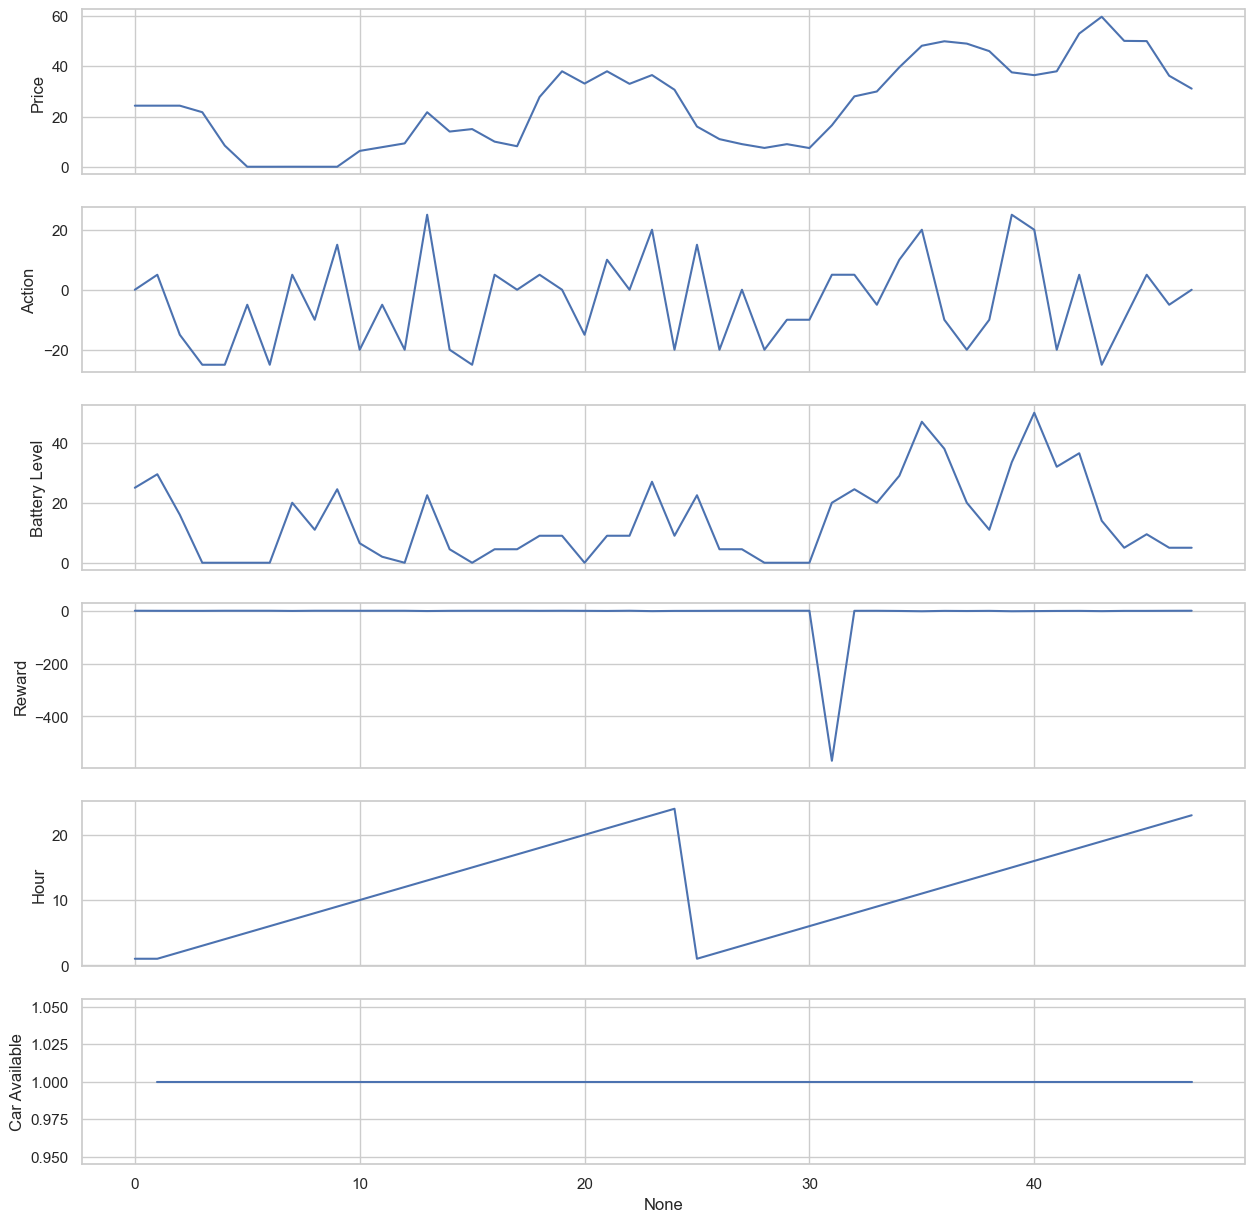

In [3]:
env = SmartGridBatteryEnv(train_data_melted)  # Replace with your actual environment
done = False

while not done:
    action = env.action_space.sample()
    next_state, reward, done, _ = env.step(action)

# convert log to dataframe
log_df = pd.DataFrame(env.log)
plot_log(log_df)


In [4]:
env = SmartGridBatteryEnv(train_data_melted)  # Replace with your actual environment
log = []

for episode in range(EPISODES):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        action = env.action_space.sample()  # Select a random action
        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward

    log.append({"Episode": episode + 1, "Total Reward": total_reward})

    # print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

env.close()  # Close the environment when done

In [5]:
log = pd.DataFrame(log)
log.head()

,Episode,Total Reward
0,1,-507001.907839
1,2,-543910.984689
2,3,-530190.440122
3,4,-520671.273150
4,5,-497456.182089


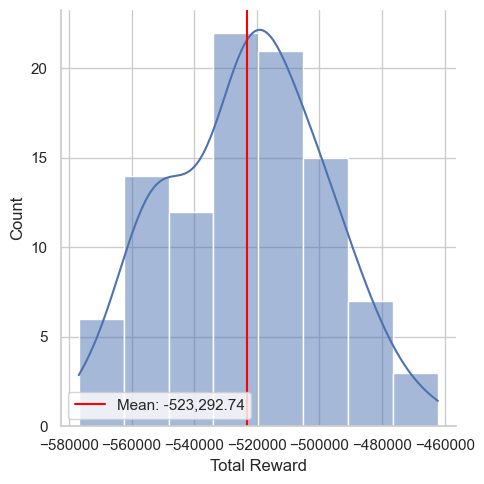

In [7]:
sns.displot(data=log, x="Total Reward", kde=True)
plt.axvline(log["Total Reward"].mean(), color='red', label=f"Mean: {format(log['Total Reward'].mean(), ',.2f')}")
plt.legend()

## Manual strategy 1: Buy at 5


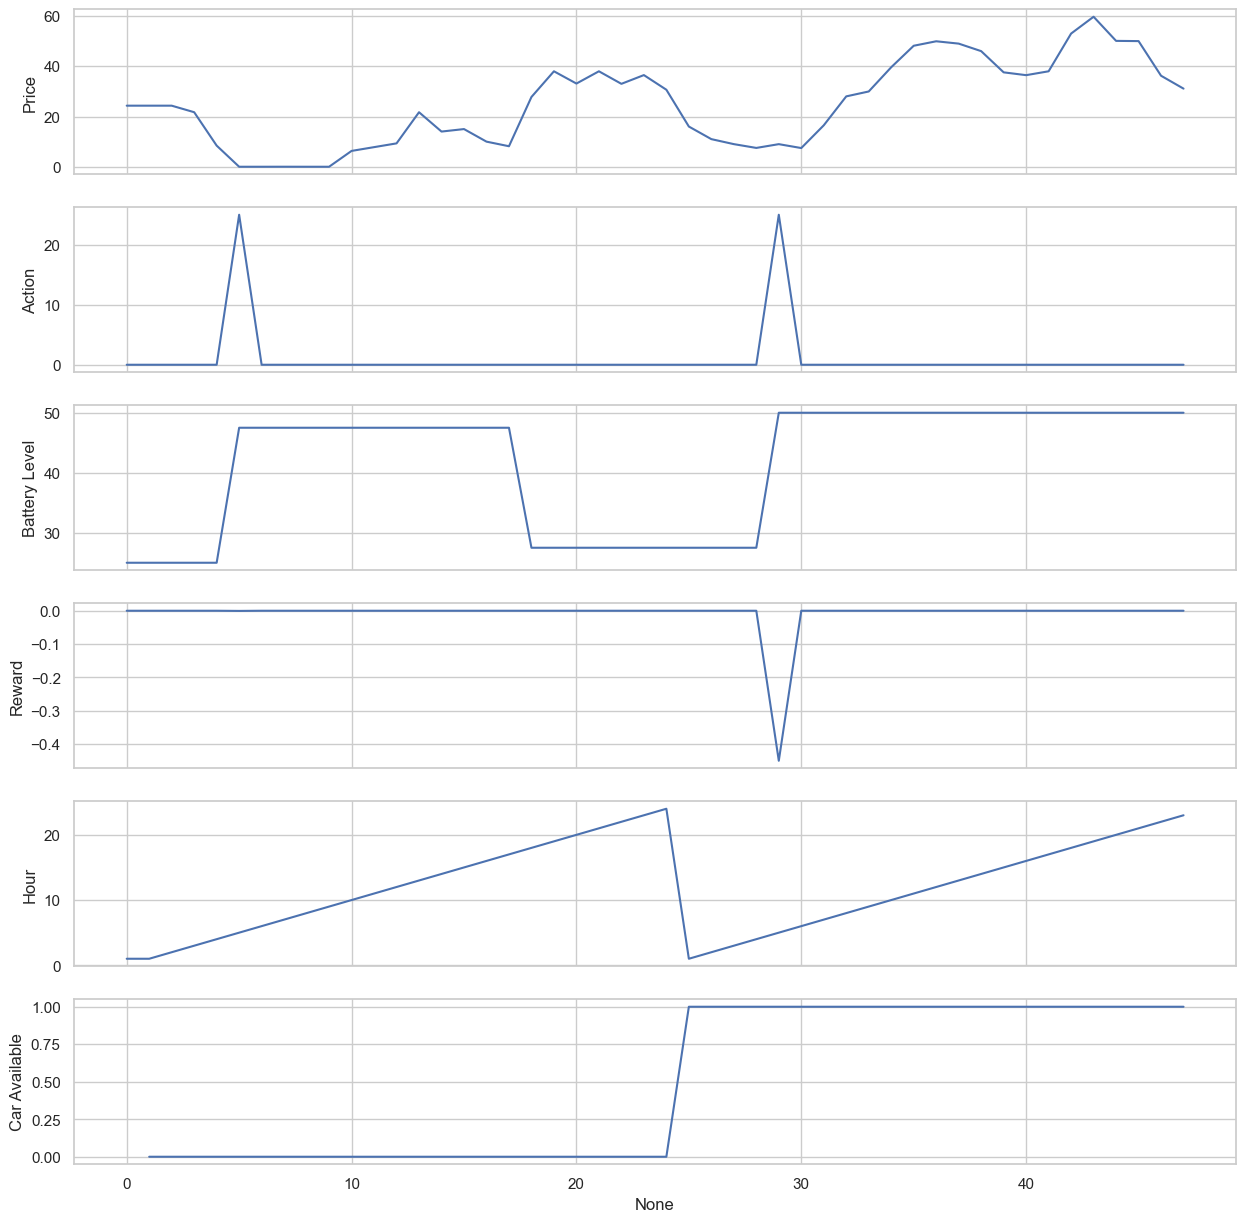

In [8]:
env = SmartGridBatteryEnv(train_data_melted)  # Replace with your actual environment
done = False

while not done:
    state = env.state
    battery_level, hour, price, weekday = state
    if hour == 5:
        action = 10
    else:
        action = 5
    next_state, reward, done, _ = env.step(action)

# convert log to dataframe
log_df = pd.DataFrame(env.log)
plot_log(log_df)

In [9]:
env = SmartGridBatteryEnv(train_data_melted)

# strategy: always charge at hour 5 and sell at hour 11

log = []

for episode in range(EPISODES):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        state = env.state
        battery_level, hour, price, weekday = state
        if hour == 5:
            action = 10
        else:
            action = 5

        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward

    log.append({"Episode": episode + 1, "Total Reward": total_reward})

env.close()
log = pd.DataFrame(log)

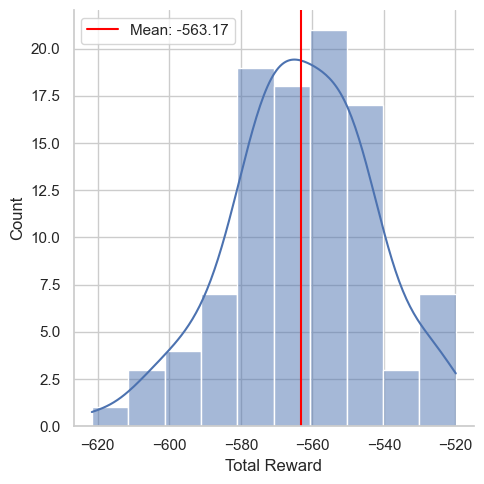

In [12]:
sns.displot(data=log, x="Total Reward", kde=True)
plt.axvline(log["Total Reward"].mean(), color='red', label=f"Mean: {format(log['Total Reward'].mean(), ',.2f')}")
plt.legend()

## Strategy 2: Buy 5 sell 11


battery_level: 25.0, hour: 1.0, price: 2.0, weekday: 0.0
battery_level: 25.0, hour: 2, price: 2, weekday: 0
battery_level: 25.0, hour: 3, price: 2, weekday: 0
battery_level: 25.0, hour: 4, price: 0, weekday: 0
battery_level: 25.0, hour: 5, price: 0, weekday: 0
battery_level: 47.5, hour: 6, price: 0, weekday: 0
battery_level: 47.5, hour: 7, price: 0, weekday: 0
battery_level: 47.5, hour: 8, price: 0, weekday: 0
battery_level: 47.5, hour: 9, price: 0, weekday: 0
battery_level: 47.5, hour: 10, price: 0, weekday: 0
battery_level: 47.5, hour: 11, price: 0, weekday: 0
battery_level: 47.5, hour: 12, price: 0, weekday: 0
battery_level: 47.5, hour: 13, price: 2, weekday: 0
battery_level: 47.5, hour: 14, price: 1, weekday: 0
battery_level: 47.5, hour: 15, price: 1, weekday: 0
battery_level: 47.5, hour: 16, price: 1, weekday: 0
battery_level: 47.5, hour: 17, price: 0, weekday: 0
battery_level: 47.5, hour: 18, price: 2, weekday: 0
battery_level: 27.5, hour: 19, price: 3, weekday: 0
battery_level: 

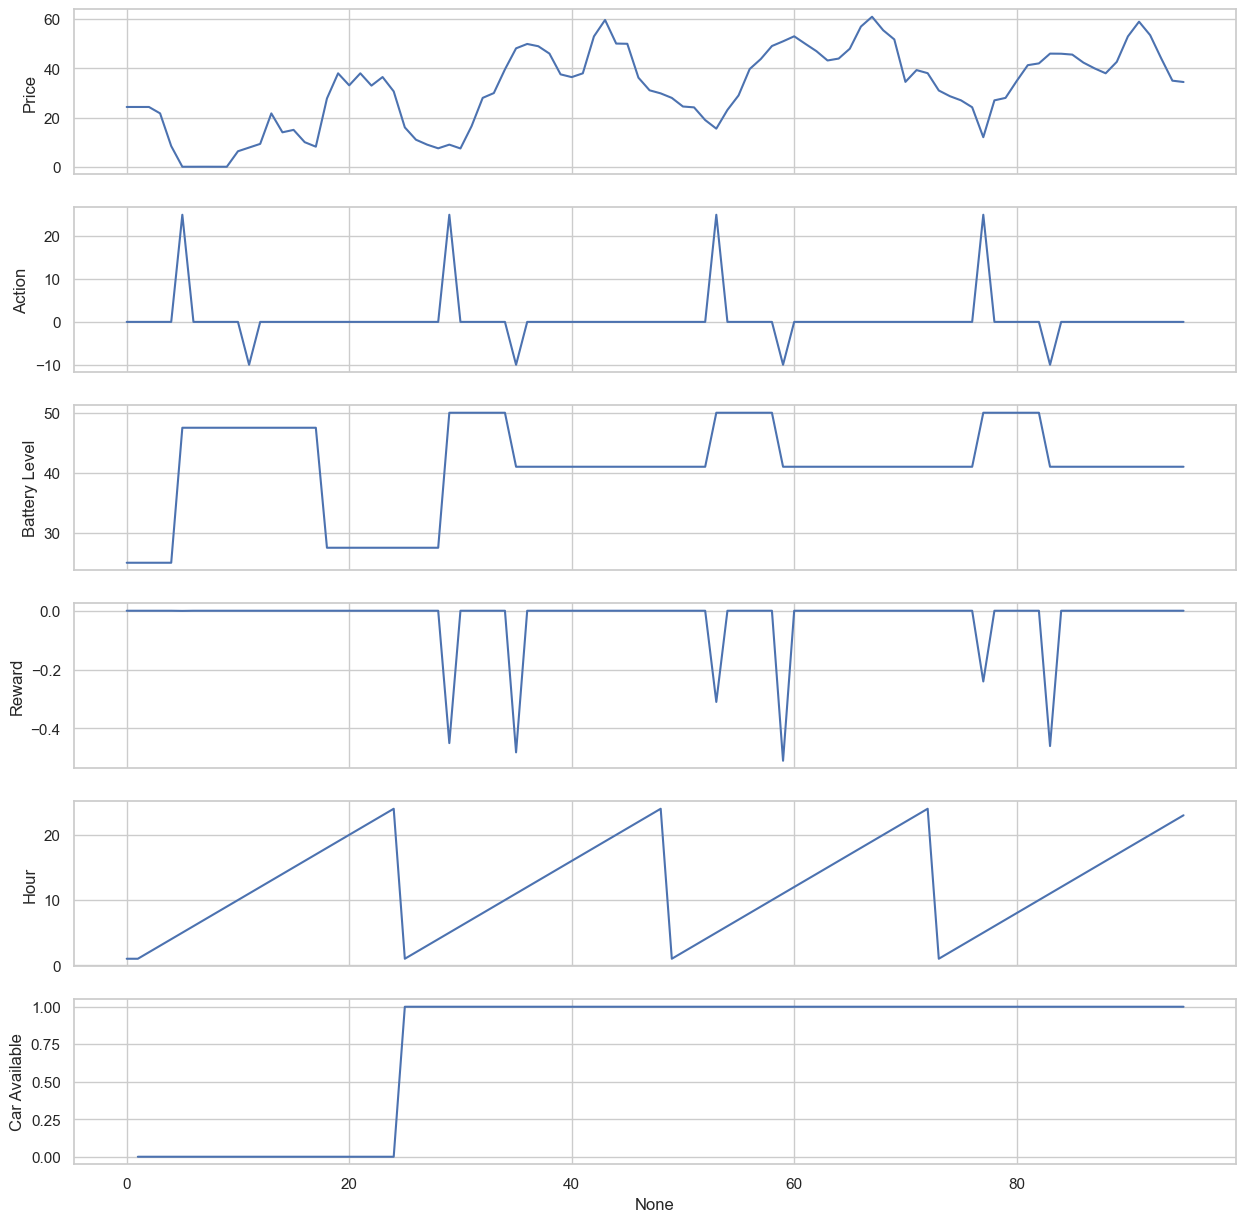

In [13]:
env = SmartGridBatteryEnv(train_data_melted)  # Replace with your actual environment
done = False

while not done:
    battery_level, hour, price, weekday = env.state
    print(f"battery_level: {battery_level}, hour: {hour}, price: {price}, weekday: {weekday}")
    # buy
    if hour == 5:
        action = 10
    # sell
    elif hour == 11:
        action = 3
    else:
        action = 5

    next_state, reward, done, _ = env.step(action)

# convert log to dataframe
log_df = pd.DataFrame(env.log)
plot_log(log_df, hours=96)


In [14]:
env = SmartGridBatteryEnv(train_data_melted)

# strategy: always charge at hour 5 and sell at hour 11

log = []

for episode in range(EPISODES):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        state = env.state
        battery_level, hour, price, weekday = state
        # buy
        if hour == 5:
            action = 10
        # sell
        elif hour == 11:
            action = 3
        else:
            action = 5

        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward

    log.append({"Episode": episode + 1, "Total Reward": total_reward})

env.close()
log = pd.DataFrame(log)
log.head()

,Episode,Total Reward
0,1,-1187.812444
1,2,-1189.091189
2,3,-1184.895644
3,4,-1187.728111
4,5,-1180.222056


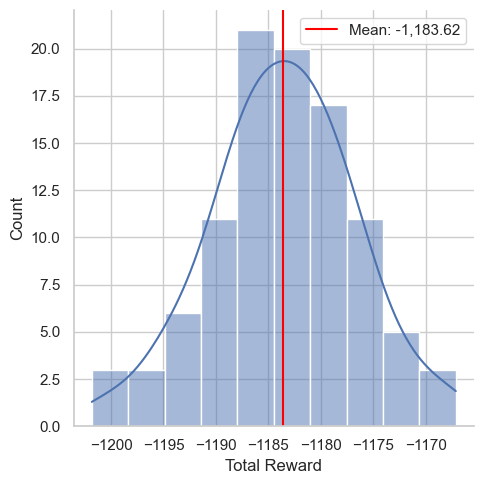

In [15]:
sns.displot(data=log, x="Total Reward", kde=True)
plt.axvline(log["Total Reward"].mean(), color='red', label=f"Mean: {format(log['Total Reward'].mean(), ',.2f')}")
plt.legend()

## Strategy 3: Buy 5 sell less 11


In [16]:
env = SmartGridBatteryEnv(train_data_melted)

# strategy: always charge at hour 5 and sell at hour 11

log = []

for episode in range(EPISODES):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        state = env.state
        battery_level, hour, price, weekday = state
        # buy
        if hour == 5:
            action = 10
        # sell
        elif hour == 11:
            action = 4
        else:
            action = 5

        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward

    log.append({"Episode": episode + 1, "Total Reward": total_reward})

env.close()
log = pd.DataFrame(log)


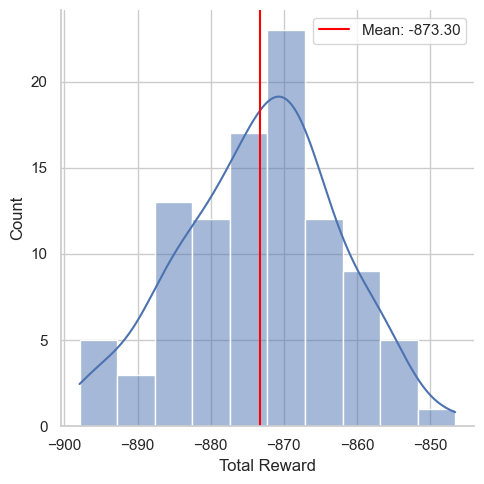

In [17]:
sns.displot(data=log, x="Total Reward", kde=True)
plt.axvline(log["Total Reward"].mean(), color='red', label=f"Mean: {format(log['Total Reward'].mean(), ',.2f')}")
plt.legend()

## Strategy 4: do nothing


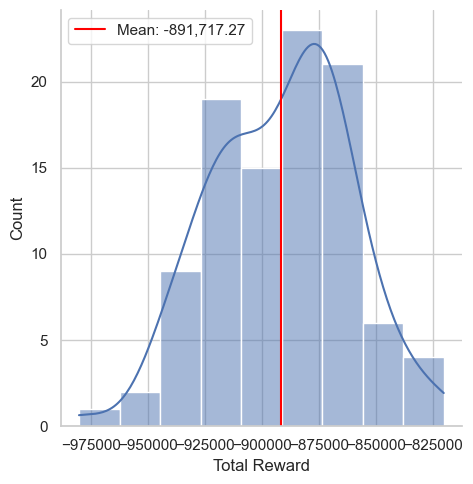

In [18]:
env = SmartGridBatteryEnv(train_data_melted)

# strategy:

log = []

for episode in range(EPISODES):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        state = env.state
        battery_level, hour, price, weekday = state

        action = 5

        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward

    log.append({"Episode": episode + 1, "Total Reward": total_reward})

env.close()
log = pd.DataFrame(log)

sns.displot(data=log, x="Total Reward", kde=True)
plt.axvline(log["Total Reward"].mean(), color='red', label=f"Mean: {format(log['Total Reward'].mean(), ',.2f')}")
plt.legend()


## Strategy 5: Buy sunday, else litte


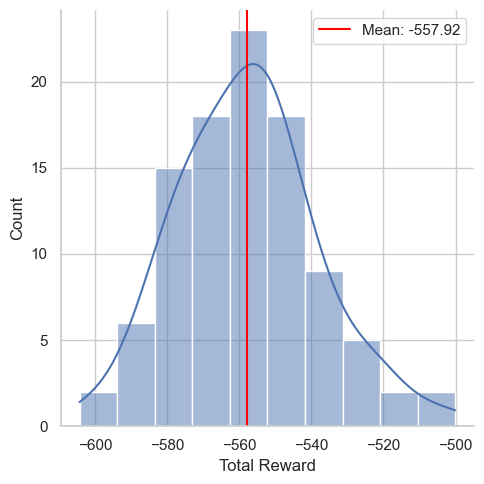

In [19]:
env = SmartGridBatteryEnv(train_data_melted)

# strategy:

log = []

for episode in range(EPISODES):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        state = env.state
        battery_level, hour, price, weekday = state

        if hour == 5 and weekday == 6:
            action = 10
        elif hour == 5:
            action = 9
        else:
            action = 5

        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward

    log.append({"Episode": episode + 1, "Total Reward": total_reward})

env.close()
log = pd.DataFrame(log)

sns.displot(data=log, x="Total Reward", kde=True)
plt.axvline(log["Total Reward"].mean(), color='red', label=f"Mean: {format(log['Total Reward'].mean(), ',.2f')}")
plt.legend()


## RL


In [20]:
env = SmartGridBatteryEnv(train_data_melted)

total_states = 1
for space in env.observation_space:
    total_states *= space.n
action_space = env.action_space.n

# Create the agent
agent = QLearningAgent(total_states, env.action_space.n)


for episode in range(EPISODES):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        # Choose action using the Q-learning agent
        action = agent.choose_action(state)

        # Take action and observe the next state, reward, and whether the episode is done
        next_state, reward, done, _ = env.step(action)

        # Update Q-table
        agent.update_q_table(state, action, reward, next_state)

        # Update state for the next iteration
        state = next_state

    # Decay epsilon after each episode
    agent.decay_epsilon()

# After training, you can use q_agent.q_table for making decisions in a new environment.





TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
import numpy as np

class MultiDimQLearningAgent:
    def __init__(self, action_space, state_dimensions, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.action_space = action_space
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        # Initialize Q-table
        self.q_table = np.zeros(state_dimensions + [len(action_space)])

    def choose_action(self, state):
        # Epsilon-greedy action selection
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space)
        else:
            return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, reward, next_state):
        # Update Q-table with new knowledge
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.gamma * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.alpha * td_error

    def decay_epsilon(self):
        # Decay epsilon for exploration-exploitation balance
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

# Example of state_dimensions for a state with 3 features, each with 10, 5, and 2 possible values respectively, and 4 possible actions
state_dimensions = [10, 5, 2] # mod this
action_space = [0, 1, 2, 3] # mod this
agent = MultiDimQLearningAgent(action_space, state_dimensions)

# Example training loop remains similar


In [ ]:
n_episodes = 1000  # Number of episodes for training
max_steps_per_episode = 100  # Max steps per episode

# Example training loop
for episode in range(n_episodes):
    state = env.reset()  # Reset the environment and get the initial state
    total_reward = 0

    for step in range(max_steps_per_episode):
        # Convert state tuple to indices for the Q-table
        state_indices = tuple(state)

        # Select an action
        action = agent.choose_action(state_indices)

        # Perform the action in the environment
        next_state, reward, done, _ = env.step(action)

        # Convert next state tuple to indices
        next_state_indices = tuple(next_state)

        # Update Q-table
        agent.update_q_table(state_indices, action, reward, next_state_indices)

        # Update state
        state = next_state

        # Accumulate reward
        total_reward += reward

        # Break the loop if the episode is finished
        if done:
            break

    # Decay epsilon after each episode
    agent.decay_epsilon()

    # Logging
    print(f"Episode: {episode}, Total Reward: {total_reward}")

# Make sure your environment's reset and step methods return the state in the correct format
# and that actions are compatible with the agent's action space.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices